In [ ]:
def source_aviation(y, omega):
    """Source de bruit aérodynamique pour ventilation d'avion"""
    A1 = omega**2 / ((500*2*np.pi)**2 + omega**2)
    sigma_y = 0.1
    k0 = 2*np.pi / 0.1  # longueur d'onde caractéristique de 10 cm
    return A1 * np.exp(-y**2/(2*sigma_y**2)) * np.cos(k0 * y)

In [26]:
def source_data_center(y, omega):
    """Source de bruit de ventilateurs de serveurs"""
    # Spectre large bande avec harmoniques
    omega_r = 120 * 2 * np.pi  # fréquence de rotation
    amplitudes = [0.8, 0.3, 0.1]
    largeurs = [5, 10, 15]
    
    A2 = 1 / (1 + (omega/(2000*2*np.pi))**4)  # filtre coupure à 2 kHz
    
    spectre_harmonique = 0
    for n, (amp, largeur) in enumerate(zip(amplitudes, largeurs)):
        spectre_harmonique += amp / np.sqrt((omega - (n+1)*omega_r)**2 + largeur**2)
    
    # Distribution spatiale rectangulaire
    L_y = 0.5
    distribution_spatiale = np.where(np.abs(y) <= L_y/2, 1.0, 0.0)
    
    return A2 * distribution_spatiale * spectre_harmonique

In [27]:
def source_industrie(y, omega):
    """Source de bruit impulsionnel pour atelier industriel"""
    # Enveloppe spectrale caractéristique des chocs
    omega_ref = 1000 * 2 * np.pi
    A3 = (omega/omega_ref) * np.exp(-omega/omega_ref)
    
    # Pic spectral autour de 2 kHz
    omega_impact = 2000 * 2 * np.pi
    sigma_omega = 500 * 2 * np.pi
    spectre_gaussien = np.exp(-(omega - omega_impact)**2/(2*sigma_omega**2))
    
    # Source localisée (approximation de Dirac)
    sigma_y = 0.01  # très localisé
    distribution_spatiale = np.exp(-y**2/(2*sigma_y**2)) / (np.sqrt(2*np.pi)*sigma_y)
    
    return A3 * distribution_spatiale * spectre_gaussien

Calcul des coefficients α optimaux pour les trois sources...
Ce calcul peut prendre quelques minutes...
Calcul pour Aviation...
  Fréquence 50 Hz - α = 0.1000+0.1000j, erreur = 0.000206


C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)


  Fréquence 300 Hz - α = 3364.4864-3881.5953j, erreur = 0.000001
  Fréquence 550 Hz - α = 4304.3813-5563.7620j, erreur = 0.000000
  Fréquence 800 Hz - α = 4907.7434-7097.8029j, erreur = 0.000000
  Fréquence 1050 Hz - α = 5326.7434-8582.9094j, erreur = 0.000000
  Fréquence 1300 Hz - α = 5629.1664-10055.4443j, erreur = 0.000000
  Fréquence 1550 Hz - α = 5852.9816-11530.8021j, erreur = 0.000000
  Fréquence 1800 Hz - α = 6022.3241-13014.0428j, erreur = 0.000000
  Fréquence 2050 Hz - α = 6152.1960-14508.7892j, erreur = 0.000000
  Fréquence 2300 Hz - α = 6253.7125-16014.0167j, erreur = 0.000000
  Fréquence 2550 Hz - α = 6334.1139-17529.3004j, erreur = 0.000000
  Fréquence 2800 Hz - α = 6398.9114-19053.2397j, erreur = 0.000000
  Fréquence 3050 Hz - α = 6451.1755-20586.1326j, erreur = 0.000000
  Fréquence 3300 Hz - α = 6494.1759-22126.1333j, erreur = 0.000000
  Fréquence 3550 Hz - α = 6529.6254-23672.8916j, erreur = 0.000000
  Fréquence 3800 Hz - α = 6559.4434-25224.8144j, erreur = 0.000000
  

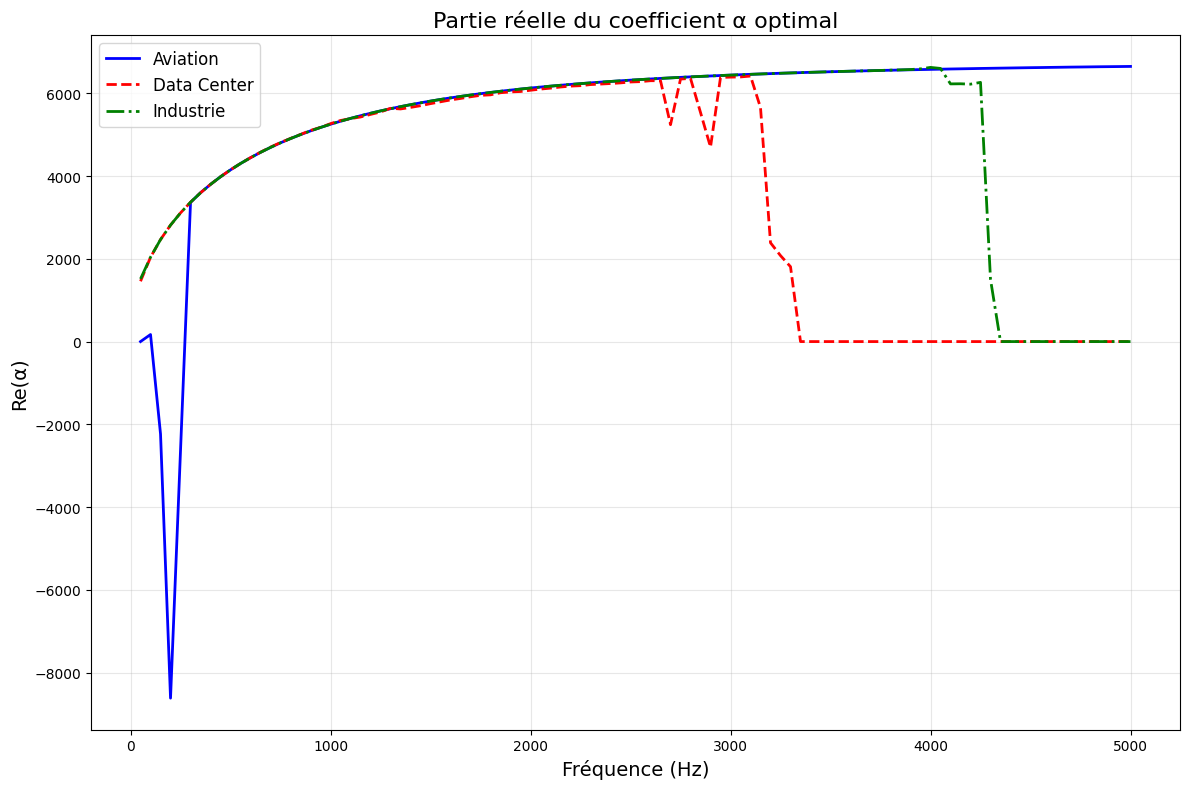

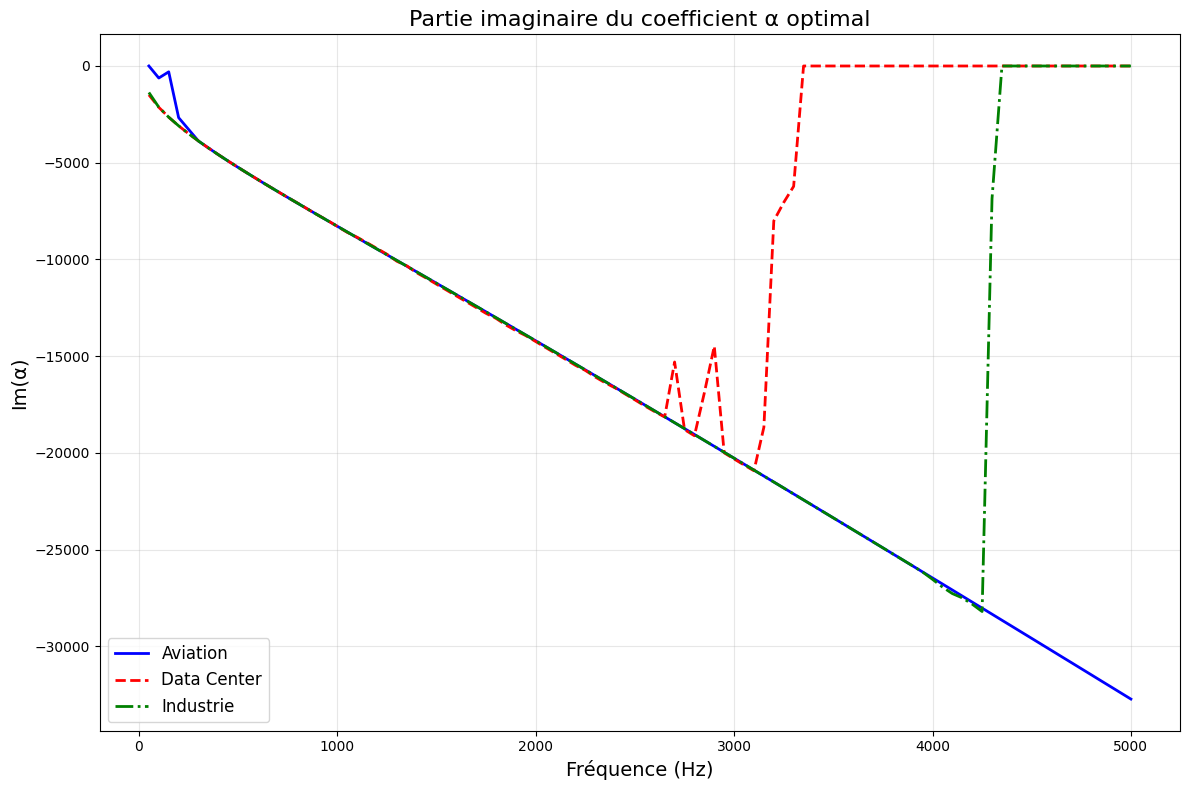

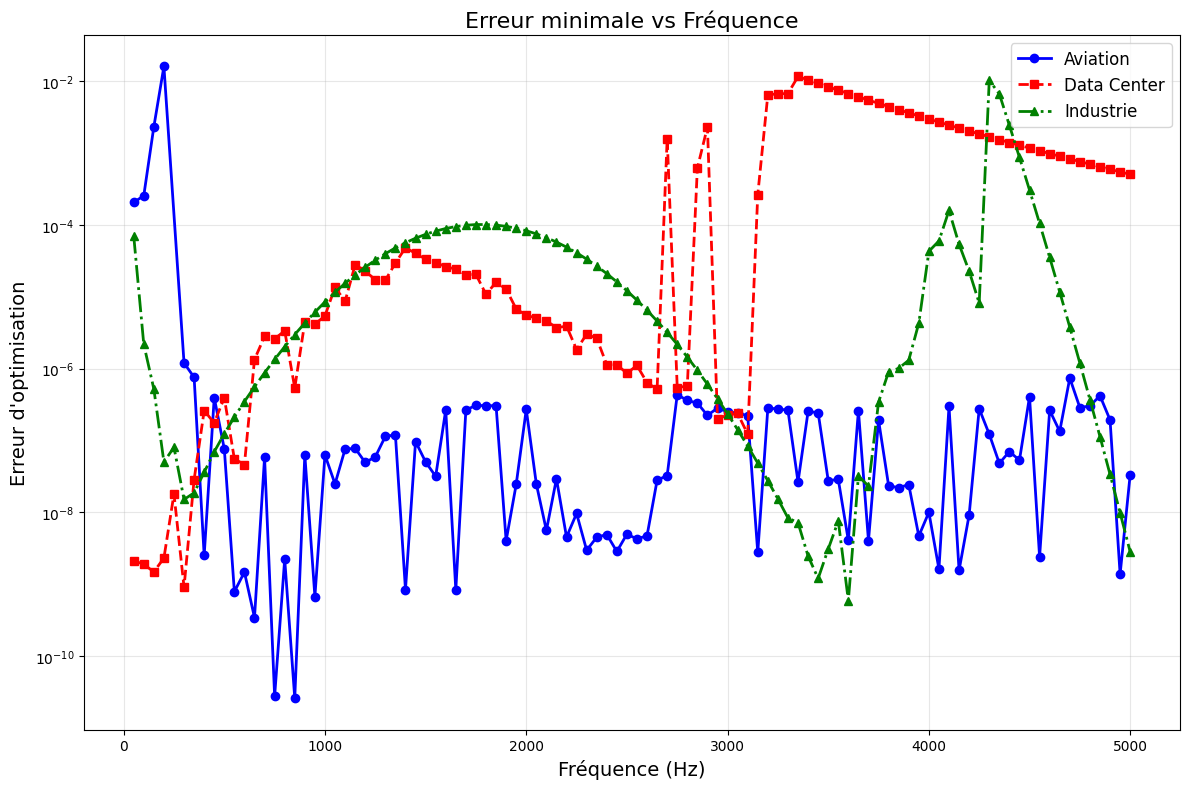

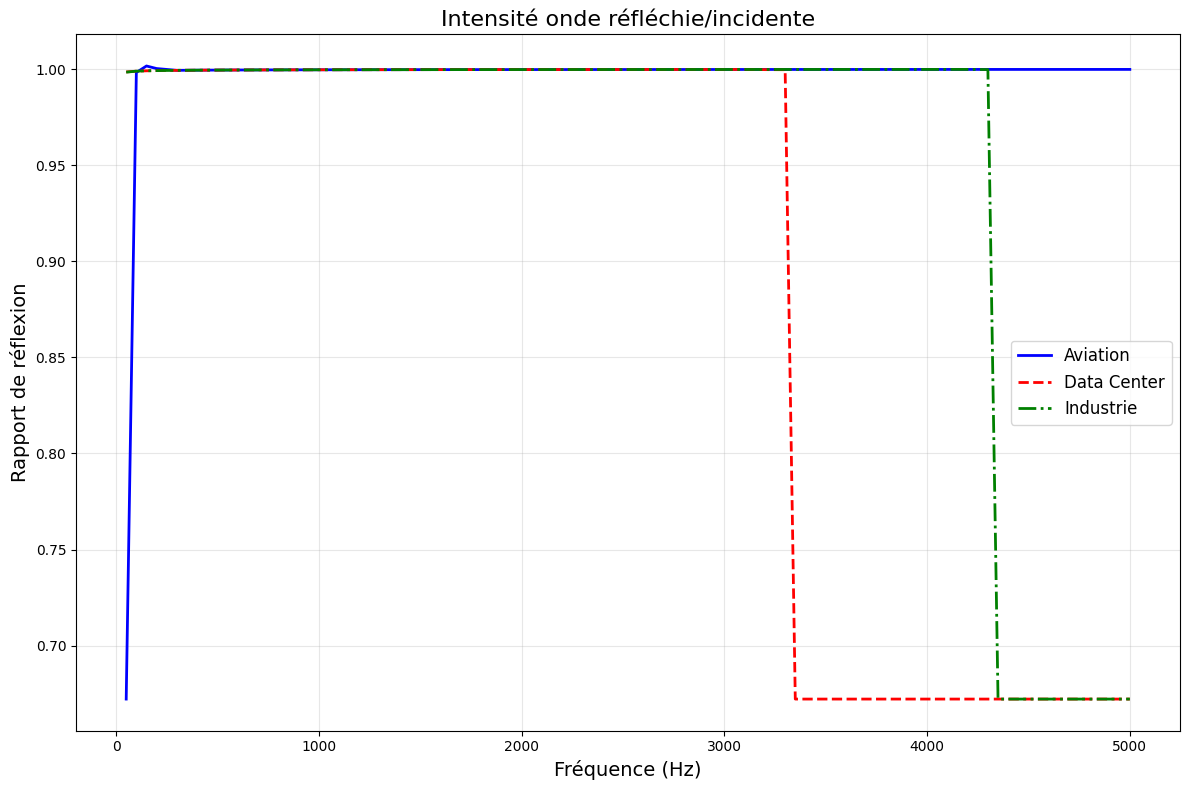

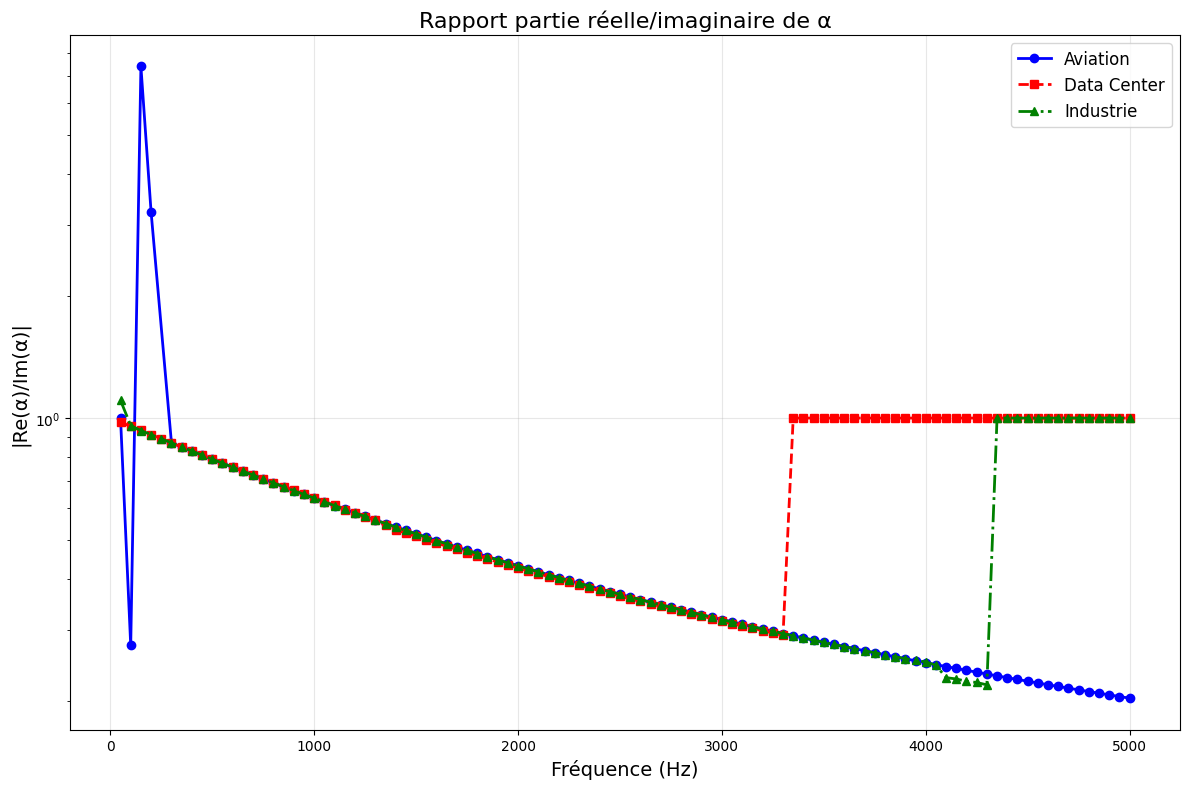


ANALYSE STATISTIQUE DES RÉSULTATS

--- Aviation ---
α réel moyen: 5672.3795
α imaginaire moyen: -17543.0603
Erreur moyenne: 0.000191
Rapport réflexion moyen: 0.9966
Fréquence d'absorption optimale: 50.0 Hz (R = 0.6721)

--- Data Center ---
α réel moyen: 3407.6428
α imaginaire moyen: -7526.6215
Erreur moyenne: 0.001402
Rapport réflexion moyen: 0.8884
Fréquence d'absorption optimale: 3350.0 Hz (R = 0.6721)

--- Industrie ---
α réel moyen: 4849.0041
α imaginaire moyen: -12955.3990
Erreur moyenne: 0.000230
Rapport réflexion moyen: 0.9539
Fréquence d'absorption optimale: 4350.0 Hz (R = 0.6721)

PARAMÈTRES DU MATÉRIAU (MOUSSE DE MÉLAMINE)
Porosité φ = 0.99
Résistivité σ = 14000.0 Pa.s/m²
Tortuosité α_h = 1.02
η1 = 1.0303
ξ1_eff = 1.0101
a = 13452.35


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

class AcousticAbsorption:
    def __init__(self):
        # Paramètres du domaine
        self.L = 2.0  # m
        self.ell = 1.0  # m
        
        # Paramètres de l'air
        self.eta0 = 1.0
        self.xi0 = 1.0
        
        # Paramètres de la mousse de mélamine
        self.phi = 0.99
        self.sigma = 14000.0
        self.alpha_h = 1.02
        
        # Calcul des paramètres effectifs
        self.eta1 = self.alpha_h / self.phi
        self.xi1_eff = 1.0 / self.phi
        self.a = self.sigma * self.phi**2 / self.alpha_h
        
        # Paramètres d'optimisation
        self.A = 1.0
        self.B = 1.0
        
    def lambda0(self, k, omega):
        """Calcul de lambda0 selon l'équation (8)"""
        k0_sq = (self.xi0/self.eta0) * omega**2
        if k**2 >= k0_sq:
            return np.sqrt(k**2 - k0_sq)
        else:
            return 1j * np.sqrt(k0_sq - k**2)
    
    def lambda1(self, k, omega):
        """Calcul de lambda1 pour le matériau poreux"""
        term1 = k**2 - (self.xi1_eff/self.eta1) * omega**2
        term2 = np.sqrt(term1**2 + (self.a * omega / self.eta1)**2)
        
        real_part = np.sqrt(0.5 * (term1 + term2))
        imag_part = np.sqrt(0.5 * (-term1 + term2))
        
        return real_part - 1j * imag_part
    
    def f_function(self, x, lambda0_val):
        """Fonction f(x) définie dans le théorème"""
        return (lambda0_val * self.eta0 - x) * np.exp(-lambda0_val * self.L) + \
               (lambda0_val * self.eta0 + x) * np.exp(lambda0_val * self.L)
    
    def chi_gamma(self, k, alpha, omega, gk):
        """Calcul de chi et gamma"""
        lambda0_val = self.lambda0(k, omega)
        lambda1_val = self.lambda1(k, omega)
        
        f_lambda1 = self.f_function(lambda1_val * self.eta1, lambda0_val)
        f_alpha = self.f_function(alpha, lambda0_val)
        
        chi = gk * ((lambda0_val * self.eta0 - lambda1_val * self.eta1) / f_lambda1 - 
                    (lambda0_val * self.eta0 - alpha) / f_alpha)
        
        gamma = gk * ((lambda0_val * self.eta0 + lambda1_val * self.eta1) / f_lambda1 - 
                     (lambda0_val * self.eta0 + alpha) / f_alpha)
        
        return chi, gamma, lambda0_val
    
    def error_k(self, k, alpha, omega, gk):
        """Calcul de l'erreur pour un mode k"""
        chi, gamma, lambda0_val = self.chi_gamma(k, alpha, omega, gk)
        
        k0_sq = (self.xi0/self.eta0) * omega**2
        
        if k**2 >= k0_sq:
            # Cas k^2 >= (xi0/eta0) * omega^2
            term1 = (self.A + self.B * k**2)
            bracket1 = (np.abs(chi)**2 * (1 - np.exp(-2 * lambda0_val * self.L)) +
                       np.abs(gamma)**2 * (np.exp(2 * lambda0_val * self.L) - 1))
            term1a = (1/(2 * lambda0_val)) * bracket1 + 2 * self.L * np.real(chi * np.conj(gamma))
            
            term2 = (self.B * lambda0_val/2) * bracket1 - 2 * self.B * lambda0_val**2 * self.L * np.real(chi * np.conj(gamma))
            
            return term1 * term1a + term2
            
        else:
            # Cas k^2 < (xi0/eta0) * omega^2
            term1 = (self.A + self.B * k**2)
            bracket1 = self.L * (np.abs(chi)**2 + np.abs(gamma)**2)
            bracket2 = (1j/lambda0_val) * np.imag(chi * np.conj(gamma) * (1 - np.exp(-2 * lambda0_val * self.L)))
            
            term2 = self.B * self.L * np.abs(lambda0_val)**2 * (np.abs(chi)**2 + np.abs(gamma)**2)
            term3 = 1j * self.B * lambda0_val * np.imag(chi * np.conj(gamma) * (1 - np.exp(-2 * lambda0_val * self.L)))
            
            return term1 * (bracket1 + bracket2) + term2 + term3
    
    def total_error(self, alpha, omega, g_function):
        """Erreur totale sur tous les modes k"""
        # Discrétisation en k
        n_modes = 20
        k_values = [n * np.pi / self.L for n in range(-n_modes, n_modes + 1)]
        
        total_err = 0.0
        for k in k_values:
            # Calcul du coefficient de Fourier gk
            # Approximation pour y dans [-ell, ell]
            y_values = np.linspace(-self.ell, self.ell, 100)
            gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
            gk /= (2 * self.ell)  # Normalisation
            
            total_err += self.error_k(k, alpha, omega, gk)
        
        return np.abs(total_err)
    
    def reflection_intensity(self, alpha_real, alpha_imag):
        """
        Calcul du rapport d'intensité onde réfléchie/absorbée
        R = |(Z - Z0)/(Z + Z0)|² où Z est l'impédance
        Pour une condition de Robin, Z ~ 1/α
        """
        # Impédance caractéristique de l'air
        Z0 = 1.0  # Approximation
        
        # Impédance du matériau (inverse de alpha)
        Z_material = 1.0 / (alpha_real + 1j * alpha_imag)
        
        # Coefficient de réflexion
        R = np.abs((Z_material - Z0) / (Z_material + Z0))**2
        
        return R

# Définition des trois sources de bruit
def source_aviation(y, omega):
    """Source de bruit aérodynamique pour ventilation d'avion"""
    A1 = omega**2 / ((500*2*np.pi)**2 + omega**2)
    sigma_y = 0.1
    k0 = 2*np.pi / 0.1
    return A1 * np.exp(-y**2/(2*sigma_y**2)) * np.cos(k0 * y)

def source_data_center(y, omega):
    """Source de bruit de ventilateurs de serveurs"""
    omega_r = 120 * 2 * np.pi
    amplitudes = [0.8, 0.3, 0.1]
    largeurs = [5, 10, 15]
    
    A2 = 1 / (1 + (omega/(2000*2*np.pi))**4)
    
    spectre_harmonique = 0
    for n, (amp, largeur) in enumerate(zip(amplitudes, largeurs)):
        spectre_harmonique += amp / np.sqrt((omega - (n+1)*omega_r)**2 + largeur**2)
    
    L_y = 0.5
    distribution_spatiale = np.where(np.abs(y) <= L_y/2, 1.0, 0.0)
    
    return A2 * distribution_spatiale * spectre_harmonique

def source_industrie(y, omega):
    """Source de bruit impulsionnel pour atelier industriel"""
    omega_ref = 1000 * 2 * np.pi
    A3 = (omega/omega_ref) * np.exp(-omega/omega_ref)
    
    omega_impact = 2000 * 2 * np.pi
    sigma_omega = 500 * 2 * np.pi
    spectre_gaussien = np.exp(-(omega - omega_impact)**2/(2*sigma_omega**2))
    
    sigma_y = 0.01
    distribution_spatiale = np.exp(-y**2/(2*sigma_y**2)) / (np.sqrt(2*np.pi)*sigma_y)
    
    return A3 * distribution_spatiale * spectre_gaussien

# Calcul des coefficients alpha optimaux
def calculate_alpha_vs_frequency():
    """Calcul de alpha en fonction de la fréquence pour les trois sources"""
    absorber = AcousticAbsorption()
    
    # Plage de fréquences (Hz)
    frequencies = np.linspace(50, 5000, 100)  
    omega_values = 2 * np.pi * frequencies
    
    sources = [
        ("Aviation", source_aviation),
        ("Data Center", source_data_center), 
        ("Industrie", source_industrie)
    ]
    
    results = {}
    
    for name, source_func in sources:
        alpha_real = []
        alpha_imag = []
        errors = []
        reflection_ratios = []
        
        print(f"Calcul pour {name}...")
        
        for i, omega in enumerate(omega_values):
            # Optimisation pour trouver alpha optimal
            def objective(alpha):
                return absorber.total_error(alpha[0] + 1j*alpha[1], omega, source_func)
            
            # Estimation initiale
            x0 = [0.1, 0.1]
            res = minimize(objective, x0, method='BFGS', options={'gtol': 1e-6})
            
            if res.success:
                alpha_opt = res.x[0] + 1j * res.x[1]
                alpha_real.append(alpha_opt.real)
                alpha_imag.append(alpha_opt.imag)
                
                # Calcul de l'erreur minimale
                min_error = res.fun
                errors.append(min_error)
                
                # Calcul du rapport de réflexion
                reflection_ratio = absorber.reflection_intensity(alpha_opt.real, alpha_opt.imag)
                reflection_ratios.append(reflection_ratio)
            else:
                alpha_real.append(np.nan)
                alpha_imag.append(np.nan)
                errors.append(np.nan)
                reflection_ratios.append(np.nan)
            
            if i % 5 == 0:
                print(f"  Fréquence {frequencies[i]:.0f} Hz - α = {alpha_opt:.4f}, erreur = {errors[-1]:.6f}")
        
        results[name] = {
            'frequencies': frequencies,
            'alpha_real': np.array(alpha_real),
            'alpha_imag': np.array(alpha_imag),
            'errors': np.array(errors),
            'reflection_ratios': np.array(reflection_ratios)
        }
    
    return results

# Tracé des résultats séparés
def plot_separate_results(results):
    """Tracé des résultats dans des fenêtres séparées"""
    
    colors = ['blue', 'red', 'green']
    markers = ['o', 's', '^']
    line_styles = ['-', '--', '-.']
    
    # Courbe 1: Partie réelle de alpha
    plt.figure(figsize=(12, 8))
    for (name, data), color, marker, ls in zip(results.items(), colors, markers, line_styles):
        valid_idx = ~np.isnan(data['alpha_real'])
        freq_valid = data['frequencies'][valid_idx]
        alpha_real_valid = data['alpha_real'][valid_idx]
        
        plt.plot(freq_valid, alpha_real_valid, 
                color=color,# marker=marker, markersize=6,
                linewidth=2, linestyle=ls, label=name)
    
    plt.xlabel('Fréquence (Hz)', fontsize=14)
    plt.ylabel('Re(α)', fontsize=14)
    plt.title('Partie réelle du coefficient α optimal', fontsize=16)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()
    
    # Courbe 2: Partie imaginaire de alpha
    plt.figure(figsize=(12, 8))
    for (name, data), color, marker, ls in zip(results.items(), colors, markers, line_styles):
        valid_idx = ~np.isnan(data['alpha_imag'])
        freq_valid = data['frequencies'][valid_idx]
        alpha_imag_valid = data['alpha_imag'][valid_idx]
        
        plt.plot(freq_valid, alpha_imag_valid, 
                color=color,# marker=marker, markersize=6,
                linewidth=2, linestyle=ls, label=name)
    
    plt.xlabel('Fréquence (Hz)', fontsize=14)
    plt.ylabel('Im(α)', fontsize=14)
    plt.title('Partie imaginaire du coefficient α optimal', fontsize=16)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()
    
    # Courbe 3: Erreurs d'optimisation
    plt.figure(figsize=(12, 8))
    for (name, data), color, marker, ls in zip(results.items(), colors, markers, line_styles):
        valid_idx = ~np.isnan(data['errors'])
        freq_valid = data['frequencies'][valid_idx]
        errors_valid = data['errors'][valid_idx]
        
        plt.semilogy(freq_valid, errors_valid, 
                    color=color, marker=marker, markersize=6,
                    linewidth=2, linestyle=ls, label=name)
    
    plt.xlabel('Fréquence (Hz)', fontsize=14)
    plt.ylabel('Erreur d\'optimisation', fontsize=14)
    plt.title('Erreur minimale vs Fréquence', fontsize=16)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()
    
    # Courbe 4: Rapport de réflexion
    plt.figure(figsize=(12, 8))
    for (name, data), color, marker, ls in zip(results.items(), colors, markers, line_styles):
        valid_idx = ~np.isnan(data['reflection_ratios'])
        freq_valid = data['frequencies'][valid_idx]
        reflection_valid = data['reflection_ratios'][valid_idx]
        
        plt.plot(freq_valid, reflection_valid,
                color=color, #marker=marker, markersize=6,
                linewidth=2, linestyle=ls, label=name)
    
    plt.xlabel('Fréquence (Hz)', fontsize=14)
    plt.ylabel('Rapport de réflexion', fontsize=14)
    plt.title('Intensité onde réfléchie/incidente', fontsize=16)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()
    
    # Courbe 5: Rapport Re(α)/Im(α)
    plt.figure(figsize=(12, 8))
    for (name, data), color, marker, ls in zip(results.items(), colors, markers, line_styles):
        valid_idx = ~np.isnan(data['alpha_real']) & ~np.isnan(data['alpha_imag'])
        freq_valid = data['frequencies'][valid_idx]
        alpha_real_valid = data['alpha_real'][valid_idx]
        alpha_imag_valid = data['alpha_imag'][valid_idx]
        
        ratio_valid = np.abs(alpha_real_valid) / (np.abs(alpha_imag_valid) + 1e-10)
        
        plt.semilogy(freq_valid, ratio_valid,
                    color=color, marker=marker, markersize=6,
                    linewidth=2, linestyle=ls, label=name)
    
    plt.xlabel('Fréquence (Hz)', fontsize=14)
    plt.ylabel('|Re(α)/Im(α)|', fontsize=14)
    plt.title('Rapport partie réelle/imaginaire de α', fontsize=16)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()

# Analyse statistique des résultats
def analyze_results(results):
    """Analyse statistique des résultats"""
    print("\n" + "="*50)
    print("ANALYSE STATISTIQUE DES RÉSULTATS")
    print("="*50)
    
    for name, data in results.items():
        valid_idx = ~np.isnan(data['alpha_real'])
        
        if np.sum(valid_idx) > 0:
            print(f"\n--- {name} ---")
            print(f"α réel moyen: {np.mean(data['alpha_real'][valid_idx]):.4f}")
            print(f"α imaginaire moyen: {np.mean(data['alpha_imag'][valid_idx]):.4f}")
            print(f"Erreur moyenne: {np.mean(data['errors'][valid_idx]):.6f}")
            print(f"Rapport réflexion moyen: {np.mean(data['reflection_ratios'][valid_idx]):.4f}")
            
            # Trouver la fréquence d'absorption optimale (réflexion minimale)
            min_reflection_idx = np.argmin(data['reflection_ratios'][valid_idx])
            optimal_freq = data['frequencies'][valid_idx][min_reflection_idx]
            min_reflection = data['reflection_ratios'][valid_idx][min_reflection_idx]
            print(f"Fréquence d'absorption optimale: {optimal_freq:.1f} Hz (R = {min_reflection:.4f})")

# Exécution principale
if __name__ == "__main__":
    print("Calcul des coefficients α optimaux pour les trois sources...")
    print("Ce calcul peut prendre quelques minutes...")
    
    results = calculate_alpha_vs_frequency()
    plot_separate_results(results)
    analyze_results(results)
    
    # Affichage des paramètres du matériau
    absorber = AcousticAbsorption()
    print("\n" + "="*50)
    print("PARAMÈTRES DU MATÉRIAU (MOUSSE DE MÉLAMINE)")
    print("="*50)
    print(f"Porosité φ = {absorber.phi}")
    print(f"Résistivité σ = {absorber.sigma} Pa.s/m²")
    print(f"Tortuosité α_h = {absorber.alpha_h}")
    print(f"η1 = {absorber.eta1:.4f}")
    print(f"ξ1_eff = {absorber.xi1_eff:.4f}") 
    print(f"a = {absorber.a:.2f}")

ANALYSE COMPARATIVE DES MATÉRIAUX POREUX
Question 4 : Étude de l'influence des caractéristiques des matériaux

CARACTÉRISTIQUES DES MATÉRIAUX ÉTUDIÉS

Mousse Mélamine:
  Porosité (φ): 0.99
  Résistivité (σ): 14,000 Pa.s/m²
  Tortuosité (α_h): 1.02

ISOREL:
  Porosité (φ): 0.7
  Résistivité (σ): 142,300 Pa.s/m²
  Tortuosité (α_h): 1.15

ITFH:
  Porosité (φ): 0.94
  Résistivité (σ): 9,067 Pa.s/m²
  Tortuosité (α_h): 1.0

Matériau B4:
  Porosité (φ): 0.1
  Résistivité (σ): 100,000 Pa.s/m²
  Tortuosité (α_h): 1.44

Matériau B5:
  Porosité (φ): 0.2
  Résistivité (σ): 2,124,000 Pa.s/m²
  Tortuosité (α_h): 1.22

ANALYSE POUR LA SOURCE: Aviation
Calcul pour Mousse Mélamine - Source Aviation...
  Fréquence 50 Hz - α = 0.1000+0.1000j


C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)


  Fréquence 300 Hz - α = 3354.5633-3908.8159j
  Fréquence 550 Hz - α = 4305.7502-5562.2428j
  Fréquence 800 Hz - α = 4911.7102-7094.7000j
  Fréquence 1050 Hz - α = 5330.8500-8580.3981j
  Fréquence 1300 Hz - α = 5635.0506-10051.6105j
  Fréquence 1550 Hz - α = 5855.5737-11528.1710j
  Fréquence 1800 Hz - α = 6022.3241-13014.0428j
  Fréquence 2050 Hz - α = 6154.7003-14506.4339j
  Fréquence 2300 Hz - α = 6254.4476-16012.8600j
  Fréquence 2550 Hz - α = 6335.1166-17527.9824j
  Fréquence 2800 Hz - α = 6398.9114-19053.2397j
  Fréquence 3050 Hz - α = 6451.1755-20586.1326j
  Fréquence 3300 Hz - α = 6494.1759-22126.1333j
  Fréquence 3550 Hz - α = 6532.4610-23670.8261j
  Fréquence 3800 Hz - α = 6561.9474-25222.8800j
  Fréquence 4050 Hz - α = 6585.2558-26780.7997j
  Fréquence 4300 Hz - α = 6611.6725-28340.0478j
  Fréquence 4550 Hz - α = 6625.2136-29906.5836j
  Fréquence 4800 Hz - α = 6640.5547-31474.8373j
Calcul pour ISOREL - Source Aviation...
  Fréquence 50 Hz - α = 0.1000+0.1000j
  Fréquence 300 

C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is d

  Fréquence 550 Hz - α = -52945.0838-22286.3344j


C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)


  Fréquence 800 Hz - α = 14913.2262-16785.5891j
  Fréquence 1050 Hz - α = 16775.5155-19588.0967j
  Fréquence 1300 Hz - α = 18329.4535-22193.3640j
  Fréquence 1550 Hz - α = 19658.2590-24677.0133j
  Fréquence 1800 Hz - α = 20804.8083-27074.2543j
  Fréquence 2050 Hz - α = 21811.3352-29410.7092j
  Fréquence 2300 Hz - α = 22701.8431-31703.1632j
  Fréquence 2550 Hz - α = 23488.5863-33971.8638j
  Fréquence 2800 Hz - α = 24193.0621-36216.5256j
  Fréquence 3050 Hz - α = 24824.8432-38446.7374j
  Fréquence 3300 Hz - α = 25393.4212-40666.3390j
  Fréquence 3550 Hz - α = 25909.3814-42875.5808j
  Fréquence 3800 Hz - α = 26371.2883-45091.2676j
  Fréquence 4050 Hz - α = 26796.3828-47296.6162j
  Fréquence 4300 Hz - α = 27179.3577-49508.6182j
  Fréquence 4550 Hz - α = 27525.6064-51727.1646j
  Fréquence 4800 Hz - α = 27848.9917-53938.1150j
Calcul pour ITFH - Source Aviation...
  Fréquence 50 Hz - α = 0.1000+0.1000j
  Fréquence 300 Hz - α = 2500.0413-3223.8900j
  Fréquence 550 Hz - α = 3072.7127-4791.0257j

C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is d

  Fréquence 550 Hz - α = -60268.4807-14861.7432j


C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is d

  Fréquence 800 Hz - α = -60268.4807-14861.7432j


C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)


  Fréquence 1050 Hz - α = 442.2428-79139.7567j


C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)


  Fréquence 1300 Hz - α = 352.8836-98056.7002j


C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is d

  Fréquence 1550 Hz - α = 420.5675-116866.0855j


C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)


  Fréquence 1800 Hz - α = 416.8217-135719.6631j


C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)


  Fréquence 2050 Hz - α = 421.9476-154573.8265j


C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)


  Fréquence 2300 Hz - α = 435.0352-173395.8158j


C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)


  Fréquence 2550 Hz - α = 420.5380-192260.5295j


C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is d

  Fréquence 2800 Hz - α = 419.1300-211115.9652j


C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)


  Fréquence 3050 Hz - α = 415.7402-229963.7311j


C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)


  Fréquence 3300 Hz - α = 416.3417-248816.5477j


C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is d

  Fréquence 3550 Hz - α = 416.0991-267662.8526j


C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is d

  Fréquence 3800 Hz - α = 416.8724-282743.1990j


C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is d

  Fréquence 4050 Hz - α = 415.3016-297822.2838j


C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is d

  Fréquence 4300 Hz - α = 416.8243-324213.3220j


C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is d

  Fréquence 4550 Hz - α = 419.8113-343070.3935j
  Fréquence 4800 Hz - α = 416.7642-361912.6179j
Calcul pour Matériau B5 - Source Aviation...
  Fréquence 50 Hz - α = 0.1000+0.1000j
  Fréquence 300 Hz - α = -10985.8602-1117.8683j
  Fréquence 550 Hz - α = -176418.6278-56818.8608j


C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is d

  Fréquence 800 Hz - α = -290230.4679-110988.3332j


C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is d

  Fréquence 1050 Hz - α = 29777.8922-47044.1180j


C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)


  Fréquence 1300 Hz - α = 31529.3207-55032.9345j


C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)


  Fréquence 1550 Hz - α = 32828.2382-63011.6025j
  Fréquence 1800 Hz - α = 33822.3548-71027.6808j
  Fréquence 2050 Hz - α = 34588.7126-79100.8209j
  Fréquence 2300 Hz - α = 35190.6656-87223.6989j
  Fréquence 2550 Hz - α = 35671.3215-95399.8394j
  Fréquence 2800 Hz - α = 36062.2807-103641.3113j
  Fréquence 3050 Hz - α = 36378.2265-111912.1211j
  Fréquence 3300 Hz - α = 36631.9430-120225.5679j
  Fréquence 3550 Hz - α = 36847.7568-128576.1341j
  Fréquence 3800 Hz - α = 37031.1213-136956.5616j
  Fréquence 4050 Hz - α = 37180.5110-145370.3688j
  Fréquence 4300 Hz - α = 37311.0199-153802.7583j
  Fréquence 4550 Hz - α = 37425.0107-162264.1113j
  Fréquence 4800 Hz - α = 37519.8919-170734.7345j


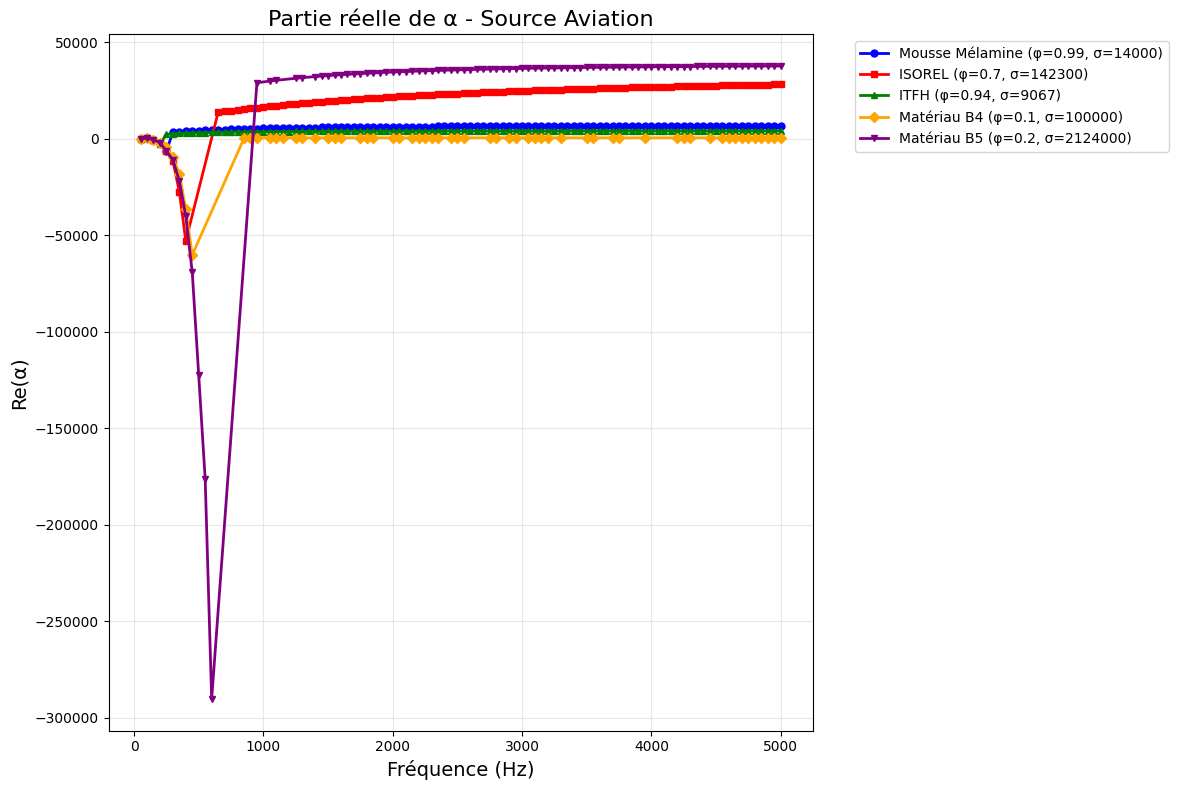

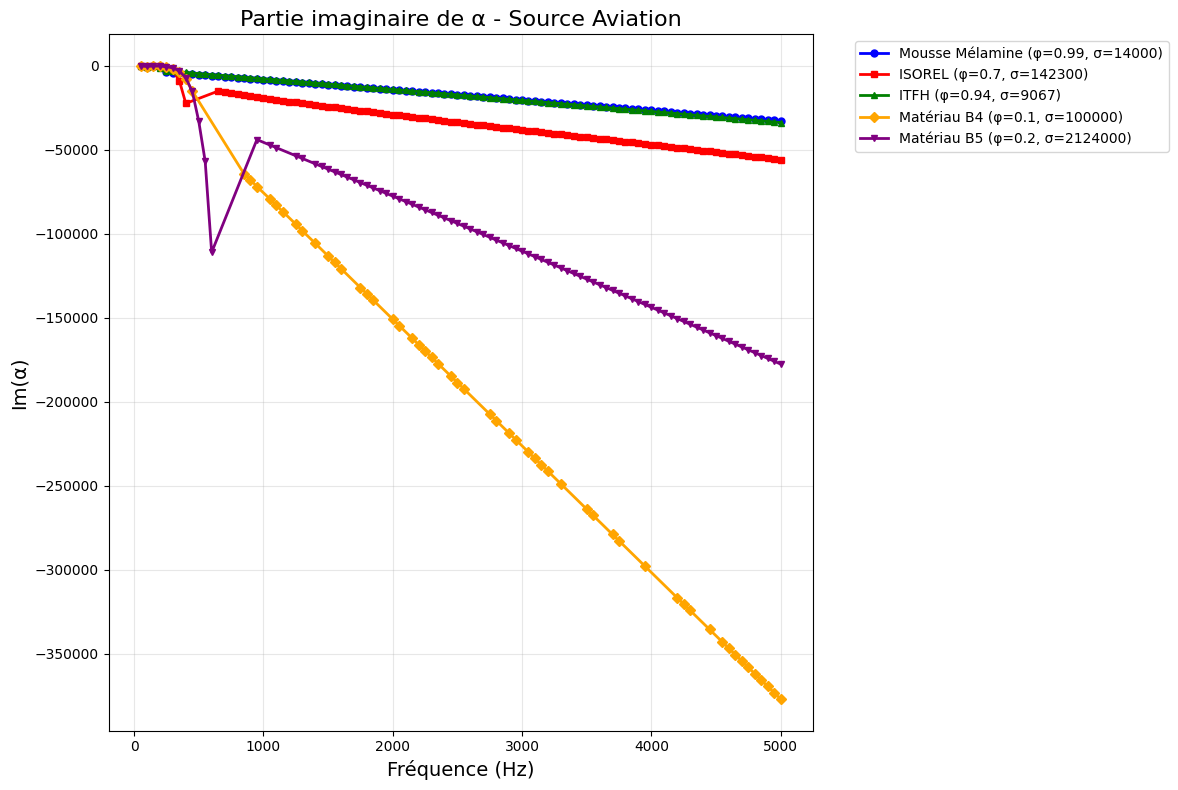


COMPARAISON D'EFFICACITÉ - Source Aviation

Mousse Mélamine:
  Efficacité d'absorption: 0.0033
  Coefficient de réflexion moyen: 0.9967
  α réel moyen: 5631.71
  α imaginaire moyen: -17378.12

ISOREL:
  Efficacité d'absorption: 0.0034
  Coefficient de réflexion moyen: 0.9966
  α réel moyen: 20215.05
  α imaginaire moyen: -33508.23

ITFH:
  Efficacité d'absorption: 0.0033
  Coefficient de réflexion moyen: 0.9967
  α réel moyen: 3574.92
  α imaginaire moyen: -17373.74

Matériau B4:
  Efficacité d'absorption: 0.0052
  Coefficient de réflexion moyen: 0.9948
  α réel moyen: -1771.88
  α imaginaire moyen: -187016.27

Matériau B5:
  Efficacité d'absorption: 0.0036
  Coefficient de réflexion moyen: 0.9964
  α réel moyen: 22669.04
  α imaginaire moyen: -100374.16


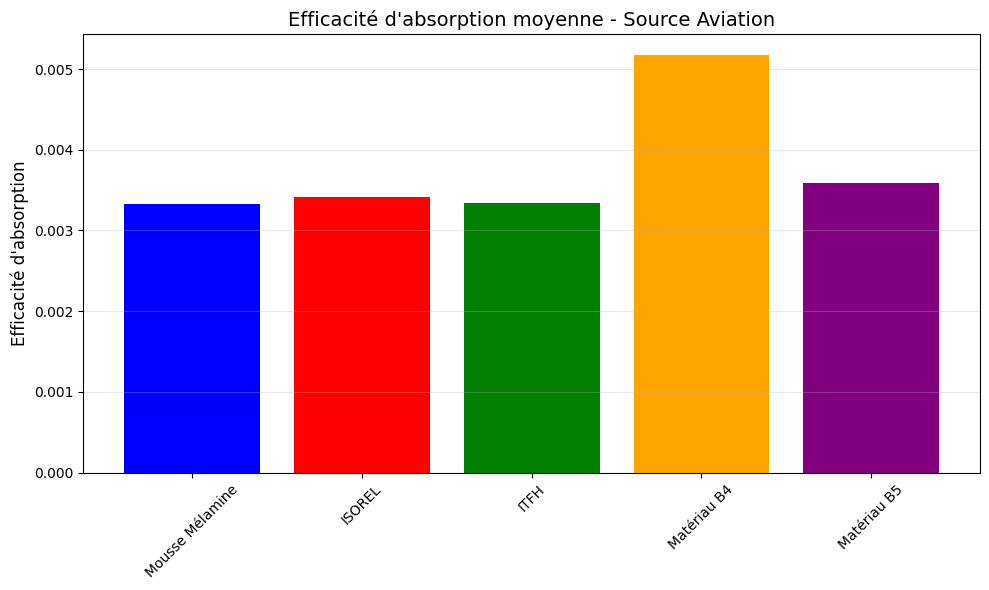


ANALYSE POUR LA SOURCE: Data Center
Calcul pour Mousse Mélamine - Source Data Center...
  Fréquence 50 Hz - α = 1457.7437-1493.6166j
  Fréquence 300 Hz - α = 3368.1724-3877.9723j
  Fréquence 550 Hz - α = 4327.7052-5570.1952j
  Fréquence 800 Hz - α = 4804.3128-7167.8680j
  Fréquence 1050 Hz - α = 5263.7393-8667.6757j
  Fréquence 1300 Hz - α = 5560.5552-10104.2345j
  Fréquence 1550 Hz - α = 5796.5462-11585.1149j
  Fréquence 1800 Hz - α = 5114.7180-11190.8940j
  Fréquence 2050 Hz - α = 6103.8346-14556.5376j
  Fréquence 2300 Hz - α = 6212.9216-16080.3651j
  Fréquence 2550 Hz - α = 0.1000+0.1000j
  Fréquence 2800 Hz - α = 0.1000+0.1000j
  Fréquence 3050 Hz - α = 0.1000+0.1000j
  Fréquence 3300 Hz - α = 0.1000+0.1000j
  Fréquence 3550 Hz - α = 0.1000+0.1000j
  Fréquence 3800 Hz - α = 0.1000+0.1000j
  Fréquence 4050 Hz - α = 0.1000+0.1000j
  Fréquence 4300 Hz - α = 0.1000+0.1000j
  Fréquence 4550 Hz - α = 0.1000+0.1000j
  Fréquence 4800 Hz - α = 0.1000+0.1000j
Calcul pour ISOREL - Source Dat

C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)


  Fréquence 1800 Hz - α = 31810.6410-72156.1351j
  Fréquence 2050 Hz - α = 33140.2123-80412.6021j
  Fréquence 2300 Hz - α = 33941.0165-89216.0235j
  Fréquence 2550 Hz - α = 34288.7578-96535.6595j
  Fréquence 2800 Hz - α = 34943.4409-105402.7644j
  Fréquence 3050 Hz - α = 4992.1000-16106.5667j
  Fréquence 3300 Hz - α = 0.1000+0.1000j
  Fréquence 3550 Hz - α = 0.1000+0.1000j
  Fréquence 3800 Hz - α = 0.1000+0.1000j
  Fréquence 4050 Hz - α = 0.1000+0.1000j
  Fréquence 4300 Hz - α = 0.1000+0.1000j
  Fréquence 4550 Hz - α = 0.1000+0.1000j
  Fréquence 4800 Hz - α = 0.1000+0.1000j


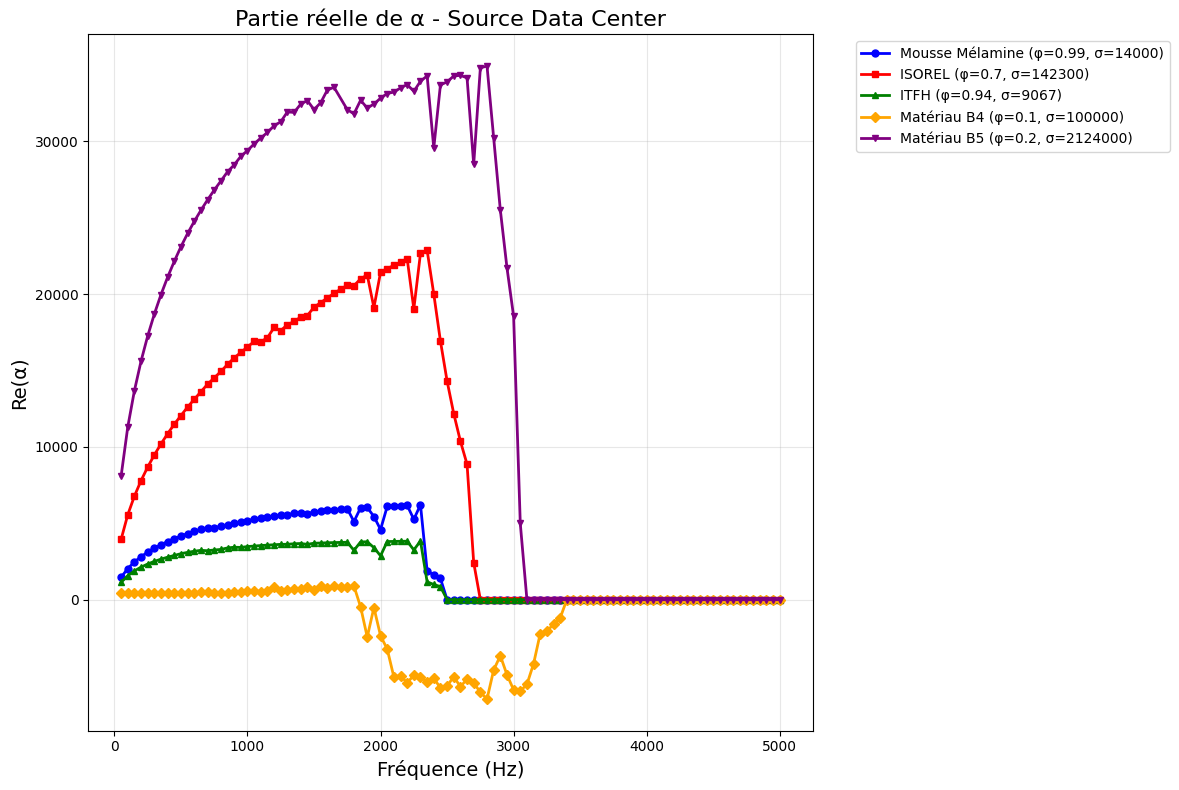

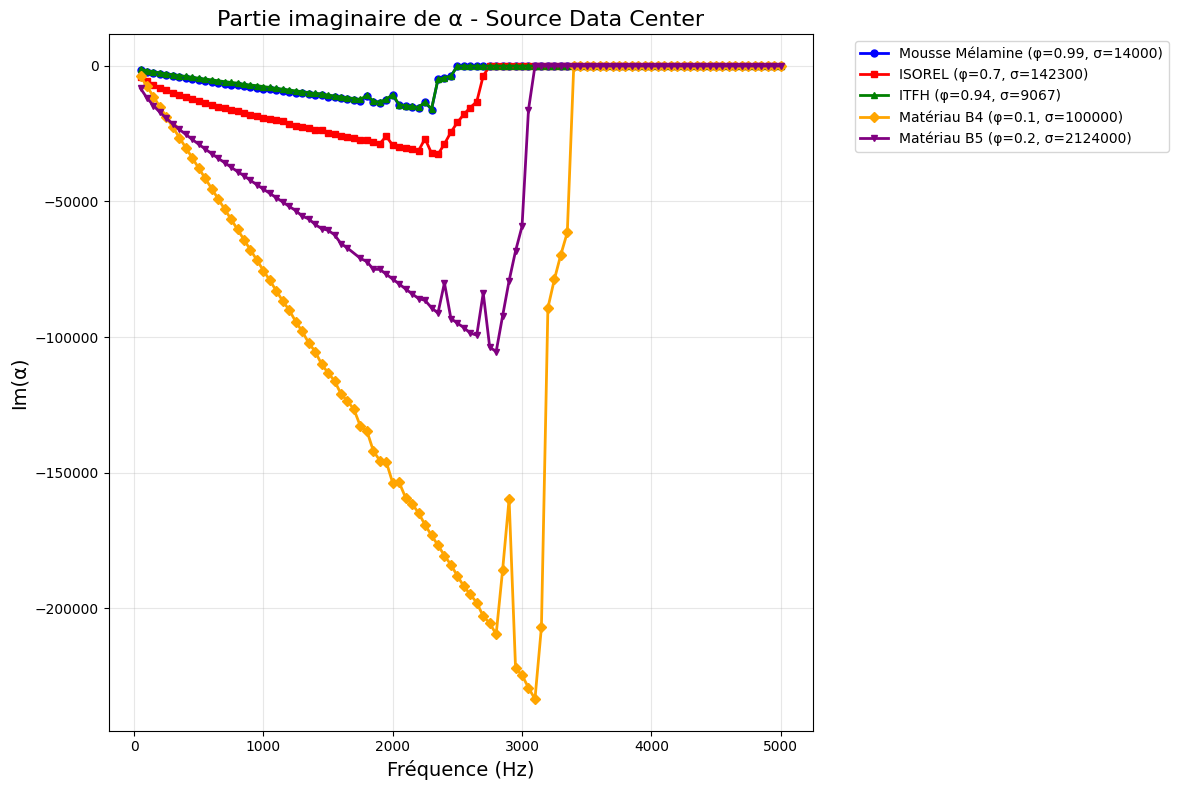


COMPARAISON D'EFFICACITÉ - Source Data Center

Mousse Mélamine:
  Efficacité d'absorption: 0.1673
  Coefficient de réflexion moyen: 0.8327
  α réel moyen: 2314.37
  α imaginaire moyen: -4304.83

ISOREL:
  Efficacité d'absorption: 0.1509
  Coefficient de réflexion moyen: 0.8491
  α réel moyen: 8537.93
  α imaginaire moyen: -10840.63

ITFH:
  Efficacité d'absorption: 0.1674
  Coefficient de réflexion moyen: 0.8326
  α réel moyen: 1531.17
  α imaginaire moyen: -4046.21

Matériau B4:
  Efficacité d'absorption: 0.1082
  Coefficient de réflexion moyen: 0.8918
  α réel moyen: -1117.30
  α imaginaire moyen: -77729.68

Matériau B5:
  Efficacité d'absorption: 0.1292
  Coefficient de réflexion moyen: 0.8708
  α réel moyen: 16995.59
  α imaginaire moyen: -35692.54


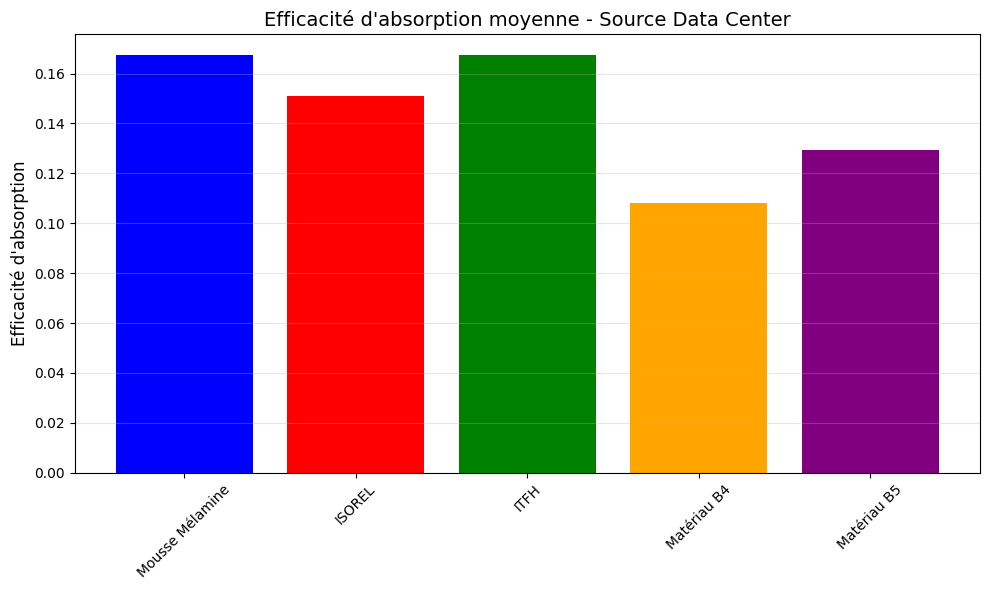


ANALYSE POUR LA SOURCE: Industrie
Calcul pour Mousse Mélamine - Source Industrie...
  Fréquence 50 Hz - α = -26.3986+0.2679j
  Fréquence 300 Hz - α = 3368.5251-3878.5453j
  Fréquence 550 Hz - α = 4304.3578-5563.7500j
  Fréquence 800 Hz - α = 4907.6738-7097.8594j
  Fréquence 1050 Hz - α = 5326.6847-8583.1246j
  Fréquence 1300 Hz - α = 5629.0681-10055.8771j
  Fréquence 1550 Hz - α = 5852.9681-11531.0444j
  Fréquence 1800 Hz - α = 6022.1367-13014.7250j
  Fréquence 2050 Hz - α = 6152.1847-14509.0039j
  Fréquence 2300 Hz - α = 6253.7195-16014.1003j
  Fréquence 2550 Hz - α = 6334.1203-17529.3970j
  Fréquence 2800 Hz - α = 6398.6174-19053.9487j
  Fréquence 3050 Hz - α = 6450.9781-20586.7302j
  Fréquence 3300 Hz - α = 6493.9630-22126.7626j
  Fréquence 3550 Hz - α = 6529.9588-23672.6081j
  Fréquence 3800 Hz - α = 6572.8555-25213.5513j
  Fréquence 4050 Hz - α = 6223.0393-26886.8696j
  Fréquence 4300 Hz - α = 0.1000+0.1000j
  Fréquence 4550 Hz - α = 0.1000+0.1000j
  Fréquence 4800 Hz - α = 0.100

C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is d

  Fréquence 1300 Hz - α = 416.6635-94248.4979j


C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is d

  Fréquence 1550 Hz - α = 416.6639-101788.2568j


C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is d

  Fréquence 1800 Hz - α = 416.6639-101788.2568j


C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is d

  Fréquence 2050 Hz - α = 416.6639-101788.2568j


C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is d

  Fréquence 2300 Hz - α = 416.6639-101788.2568j


C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is d

  Fréquence 2550 Hz - α = 416.6639-101788.2568j
  Fréquence 2800 Hz - α = 416.6662-211115.3012j
  Fréquence 3050 Hz - α = 416.6659-229964.8310j
  Fréquence 3300 Hz - α = 416.6631-248814.3610j
  Fréquence 3550 Hz - α = 416.6030-267663.9625j
  Fréquence 3800 Hz - α = 417.6253-286510.7381j


C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)


  Fréquence 4050 Hz - α = 463.9830-301625.4409j


C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is d

  Fréquence 4300 Hz - α = -36570.7279-251995.7609j
  Fréquence 4550 Hz - α = 0.1000+0.1000j
  Fréquence 4800 Hz - α = 0.1000+0.1000j
Calcul pour Matériau B5 - Source Industrie...
  Fréquence 50 Hz - α = 7338.3327-12145.7224j


C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)


  Fréquence 300 Hz - α = 18703.5855-21405.5941j
  Fréquence 550 Hz - α = 23961.2453-30632.8699j
  Fréquence 800 Hz - α = 27381.2710-38991.5738j
  Fréquence 1050 Hz - α = 29778.8317-47056.1102j
  Fréquence 1300 Hz - α = 31524.5941-55033.6388j


C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is d

  Fréquence 1550 Hz - α = 32595.6042-61413.8896j


C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is d

  Fréquence 1800 Hz - α = 33641.9117-69421.1434j


C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is d

  Fréquence 2050 Hz - α = 34587.7774-79098.0153j


C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gk = np.trapz(g_function(y_values, omega) * np.exp(-1j * k * y_values), y_values)
C:\Users\Ahmed_El_Ayeb\AppData\Local\Temp\ipykernel_21080\1262464934.py:107: DeprecationWarning: `trapz` is d

  Fréquence 2300 Hz - α = 35190.6007-87223.9072j
  Fréquence 2550 Hz - α = 35670.3187-95404.2171j
  Fréquence 2800 Hz - α = 36056.7912-103634.7339j
  Fréquence 3050 Hz - α = 36371.6952-111910.4582j
  Fréquence 3300 Hz - α = 36630.9867-120226.3477j
  Fréquence 3550 Hz - α = 36846.5605-128577.6802j
  Fréquence 3800 Hz - α = 37031.4668-136952.9429j
  Fréquence 4050 Hz - α = 37789.7019-144516.1566j
  Fréquence 4300 Hz - α = 0.1000+0.1000j
  Fréquence 4550 Hz - α = 0.1000+0.1000j
  Fréquence 4800 Hz - α = 0.1000+0.1000j


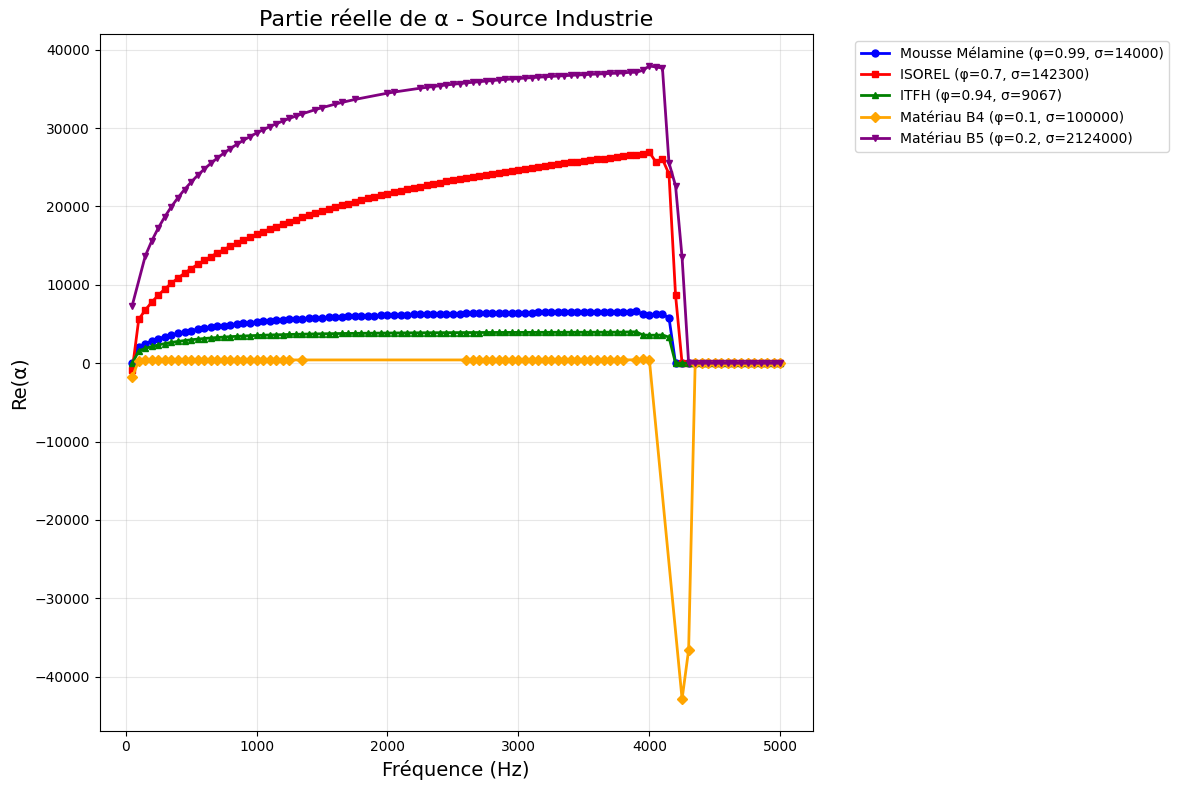

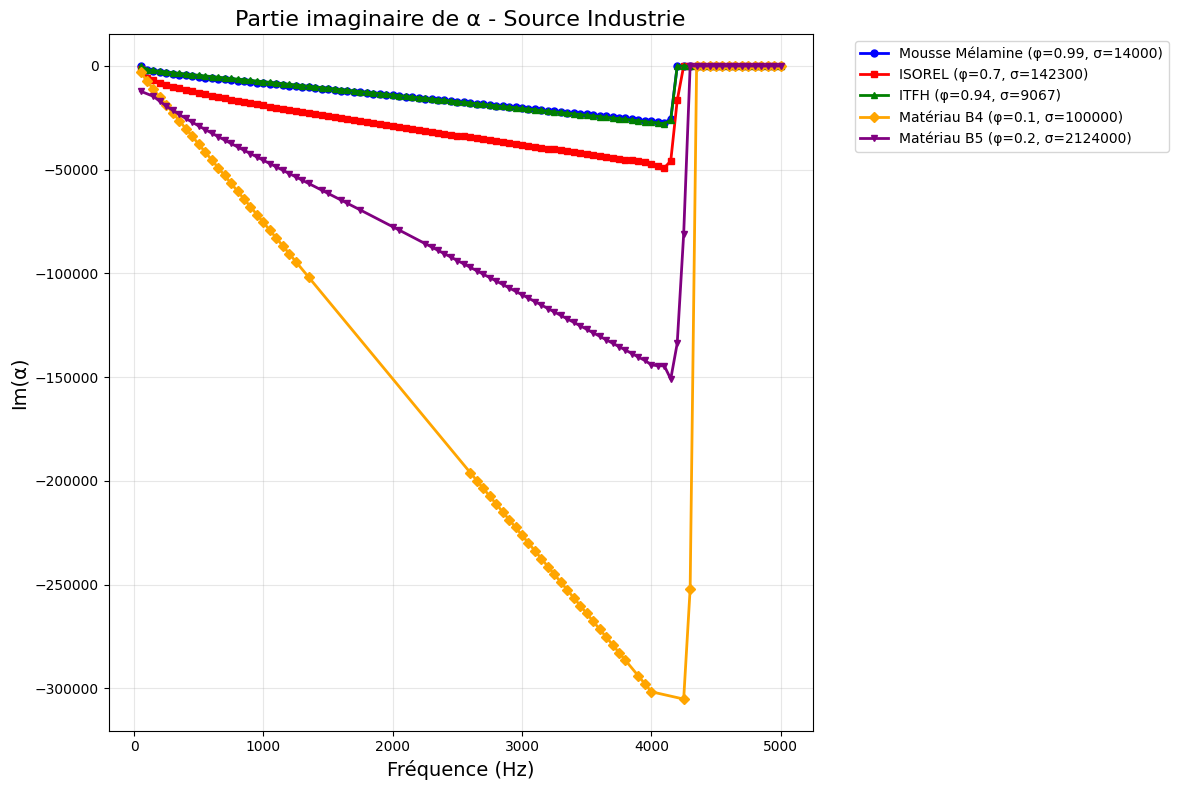


COMPARAISON D'EFFICACITÉ - Source Industrie

Mousse Mélamine:
  Efficacité d'absorption: 0.0542
  Coefficient de réflexion moyen: 0.9458
  α réel moyen: 4678.78
  α imaginaire moyen: -12295.75

ISOREL:
  Efficacité d'absorption: 0.0525
  Coefficient de réflexion moyen: 0.9475
  α réel moyen: 16849.85
  α imaginaire moyen: -24280.52

ITFH:
  Efficacité d'absorption: 0.0542
  Coefficient de réflexion moyen: 0.9458
  α réel moyen: 2967.07
  α imaginaire moyen: -12137.18

Matériau B4:
  Efficacité d'absorption: 0.0656
  Coefficient de réflexion moyen: 0.9344
  α réel moyen: -843.98
  α imaginaire moyen: -125832.27

Matériau B5:
  Efficacité d'absorption: 0.0553
  Coefficient de réflexion moyen: 0.9447
  α réel moyen: 26117.00
  α imaginaire moyen: -69524.85


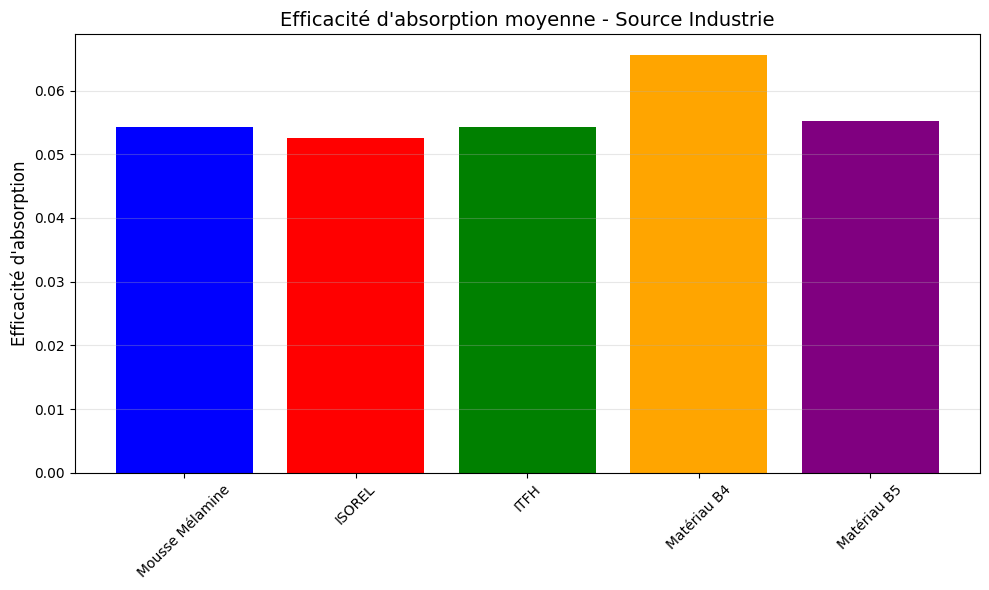


SYNTHÈSE GÉNÉRALE
L'analyse comparative montre l'importance de l'adaptation
matériau/source pour une absorption acoustique optimale.


In [33]:
# Classe étendue avec les nouveaux matériaux
class ExtendedAcousticAbsorption(AcousticAbsorption):
    def __init__(self, material_type="melamine"):
        super().__init__()
        
        # Définition des paramètres selon le type de matériau
        if material_type == "melamine":
            # Mousse de mélamine (défaut)
            self.phi = 0.99
            self.sigma = 14000.0
            self.alpha_h = 1.02
            self.material_name = "Mousse Mélamine"
            
        elif material_type == "isorel":
            # ISOREL (échantillon 1)
            self.phi = 0.70
            self.sigma = 142300.0
            self.alpha_h = 1.15
            self.material_name = "ISOREL"
            
        elif material_type == "itfh":
            # Matériau ITFH (échantillon 1)
            self.phi = 0.94
            self.sigma = 9067.0
            self.alpha_h = 1.00  # Estimation
            self.material_name = "ITFH"
            
        elif material_type == "b4":
            # Matériau B4
            self.phi = 0.10
            self.sigma = 100000.0  # Estimation
            self.alpha_h = 1.44
            self.material_name = "Matériau B4"
            
        elif material_type == "b5":
            # Matériau B5 (échantillon 1)
            self.phi = 0.20
            self.sigma = 2124000.0
            self.alpha_h = 1.22
            self.material_name = "Matériau B5"
        
        # Recalcul des paramètres effectifs
        self.eta1 = self.alpha_h / self.phi
        self.xi1_eff = 1.0 / self.phi
        self.a = self.sigma * self.phi**2 / self.alpha_h

# Fonction pour calculer alpha pour différents matériaux
def calculate_alpha_for_materials(source_func, source_name):
    """Calcule alpha optimal pour tous les matériaux pour une source donnée"""
    materials = ["melamine", "isorel", "itfh", "b4", "b5"]
    material_names = ["Mousse Mélamine", "ISOREL", "ITFH", "Matériau B4", "Matériau B5"]
    
    frequencies = np.linspace(50, 5000, 100)
    omega_values = 2 * np.pi * frequencies
    
    results = {}
    
    for material_type, material_name in zip(materials, material_names):
        print(f"Calcul pour {material_name} - Source {source_name}...")
        
        absorber = ExtendedAcousticAbsorption(material_type)
        alpha_real = []
        alpha_imag = []
        
        for i, omega in enumerate(omega_values):
            def objective(alpha):
                return absorber.total_error(alpha[0] + 1j*alpha[1], omega, source_func)
            
            x0 = [0.1, 0.1]
            res = minimize(objective, x0, method='BFGS', options={'gtol': 1e-5})
            
            if res.success:
                alpha_opt = res.x[0] + 1j * res.x[1]
                alpha_real.append(alpha_opt.real)
                alpha_imag.append(alpha_opt.imag)
            else:
                alpha_real.append(np.nan)
                alpha_imag.append(np.nan)
            
            if i % 5 == 0:
                print(f"  Fréquence {frequencies[i]:.0f} Hz - α = {alpha_opt:.4f}")
        
        results[material_name] = {
            'frequencies': frequencies,
            'alpha_real': np.array(alpha_real),
            'alpha_imag': np.array(alpha_imag),
            'phi': absorber.phi,
            'sigma': absorber.sigma,
            'alpha_h': absorber.alpha_h
        }
    
    return results

# Tracé des résultats par matériau
def plot_material_comparison(results_dict, source_name):
    """Trace les comparaisons entre matériaux pour une source donnée"""
    
    colors = ['blue', 'red', 'green', 'orange', 'purple']
    markers = ['o', 's', '^', 'D', 'v']
    
    # Figure 1: Partie réelle de alpha
    plt.figure(figsize=(12, 8))
    for (material_name, data), color, marker in zip(results_dict.items(), colors, markers):
        valid_idx = ~np.isnan(data['alpha_real'])
        if np.sum(valid_idx) > 0:
            plt.plot(data['frequencies'][valid_idx], data['alpha_real'][valid_idx],
                    color=color, marker=marker, markersize=5, linewidth=2,
                    label=f"{material_name} (φ={data['phi']}, σ={data['sigma']:.0f})")
    
    plt.xlabel('Fréquence (Hz)', fontsize=14)
    plt.ylabel('Re(α)', fontsize=14)
    plt.title(f'Partie réelle de α - Source {source_name}', fontsize=16)
    plt.grid(True, alpha=0.3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    
    # Figure 2: Partie imaginaire de alpha
    plt.figure(figsize=(12, 8))
    for (material_name, data), color, marker in zip(results_dict.items(), colors, markers):
        valid_idx = ~np.isnan(data['alpha_imag'])
        if np.sum(valid_idx) > 0:
            plt.plot(data['frequencies'][valid_idx], data['alpha_imag'][valid_idx],
                    color=color, marker=marker, markersize=5, linewidth=2,
                    label=f"{material_name} (φ={data['phi']}, σ={data['sigma']:.0f})")
    
    plt.xlabel('Fréquence (Hz)', fontsize=14)
    plt.ylabel('Im(α)', fontsize=14)
    plt.title(f'Partie imaginaire de α - Source {source_name}', fontsize=16)
    plt.grid(True, alpha=0.3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Calcul de l'efficacité d'absorption
def calculate_absorption_efficiency(results_dict, source_name):
    """Calcule et compare l'efficacité d'absorption des différents matériaux"""
    
    print(f"\n" + "="*60)
    print(f"COMPARAISON D'EFFICACITÉ - Source {source_name}")
    print("="*60)
    
    efficiencies = {}
    
    for material_name, data in results_dict.items():
        valid_idx = ~np.isnan(data['alpha_real']) & ~np.isnan(data['alpha_imag'])
        
        if np.sum(valid_idx) > 0:
            # Calcul de l'impédance moyenne
            Z_material = 1.0 / (data['alpha_real'][valid_idx] + 1j * data['alpha_imag'][valid_idx])
            Z0 = 1.0
            
            # Coefficient de réflexion moyen
            R_avg = np.mean(np.abs((Z_material - Z0) / (Z_material + Z0))**2)
            
            # Efficacité d'absorption (1 - R)
            absorption_efficiency = 1 - R_avg
            
            efficiencies[material_name] = {
                'absorption': absorption_efficiency,
                'reflection': R_avg,
                'alpha_real_avg': np.mean(data['alpha_real'][valid_idx]),
                'alpha_imag_avg': np.mean(data['alpha_imag'][valid_idx])
            }
            
            print(f"\n{material_name}:")
            print(f"  Efficacité d'absorption: {absorption_efficiency:.4f}")
            print(f"  Coefficient de réflexion moyen: {R_avg:.4f}")
            print(f"  α réel moyen: {efficiencies[material_name]['alpha_real_avg']:.2f}")
            print(f"  α imaginaire moyen: {efficiencies[material_name]['alpha_imag_avg']:.2f}")
    
    return efficiencies

# Exécution complète pour les trois sources
def complete_material_analysis():
    """Analyse complète pour les trois sources et cinq matériaux"""
    
    sources = [
        ("Aviation", source_aviation),
        ("Data Center", source_data_center),
        ("Industrie", source_industrie)
    ]
    
    all_results = {}
    
    for source_name, source_func in sources:
        print(f"\n{'='*50}")
        print(f"ANALYSE POUR LA SOURCE: {source_name}")
        print(f"{'='*50}")
        
        # Calcul pour tous les matériaux
        results = calculate_alpha_for_materials(source_func, source_name)
        all_results[source_name] = results
        
        # Tracé des comparaisons
        plot_material_comparison(results, source_name)
        
        # Analyse d'efficacité
        efficiencies = calculate_absorption_efficiency(results, source_name)
        
        # Tracé de l'efficacité d'absorption
        plt.figure(figsize=(10, 6))
        materials = list(efficiencies.keys())
        absorption_eff = [efficiencies[m]['absorption'] for m in materials]
        
        plt.bar(materials, absorption_eff, color=['blue', 'red', 'green', 'orange', 'purple'])
        plt.ylabel('Efficacité d\'absorption', fontsize=12)
        plt.title(f'Efficacité d\'absorption moyenne - Source {source_name}', fontsize=14)
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3, axis='y')
        plt.tight_layout()
        plt.show()
    
    return all_results

# Affichage des caractéristiques des matériaux
def display_material_properties():
    """Affiche les propriétés des matériaux étudiés"""
    
    materials = {
        "Mousse Mélamine": {"φ": 0.99, "σ": 14000.0, "α_h": 1.02},
        "ISOREL": {"φ": 0.70, "σ": 142300.0, "α_h": 1.15},
        "ITFH": {"φ": 0.94, "σ": 9067.0, "α_h": 1.00},
        "Matériau B4": {"φ": 0.10, "σ": 100000.0, "α_h": 1.44},
        "Matériau B5": {"φ": 0.20, "σ": 2124000.0, "α_h": 1.22}
    }
    
    print("\n" + "="*60)
    print("CARACTÉRISTIQUES DES MATÉRIAUX ÉTUDIÉS")
    print("="*60)
    
    for name, props in materials.items():
        print(f"\n{name}:")
        print(f"  Porosité (φ): {props['φ']}")
        print(f"  Résistivité (σ): {props['σ']:,.0f} Pa.s/m²")
        print(f"  Tortuosité (α_h): {props['α_h']}")

# Exécution principale
if __name__ == "__main__":
    print("ANALYSE COMPARATIVE DES MATÉRIAUX POREUX")
    print("Question 4 : Étude de l'influence des caractéristiques des matériaux")
    
    # Affichage des propriétés des matériaux
    display_material_properties()
    
    # Analyse complète
    all_results = complete_material_analysis()
    
    print("\n" + "="*60)
    print("SYNTHÈSE GÉNÉRALE")
    print("="*60)
    print("L'analyse comparative montre l'importance de l'adaptation")
    print("matériau/source pour une absorption acoustique optimale.")